In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# data infos
data_names = ['balance_scale', 'ecoli', 'forest', 'glass', 'letter', 'libras', 'optdigits', 'page_blocks',
                'seeds','spectrometer', 'vehicle', 'vowel', 'waveform', 'wine_quality', 'yeast']
string = ''
for d in range(len(data_names)):
    data_name = data_names[d]
    data = pd.read_csv('data/{}.csv'.format(data_name))
    X = np.array(data.iloc[:,:-1])
    y = np.array(data.iloc[:,-1])
    n_feature = X.shape[1]
    n_instance = X.shape[0]
    n_class = len(np.unique(y))
    string += data_name + ' & ' + str(int(n_instance)) + ' & ' + str(int(n_feature)) + ' & ' + str(int(n_class)) + ' \\\\\n'
    
print(string)

balance_scale & 625 & 4 & 3 \\
ecoli & 336 & 7 & 8 \\
forest & 523 & 27 & 4 \\
glass & 214 & 9 & 6 \\
letter & 2000 & 16 & 26 \\
libras & 360 & 90 & 15 \\
optdigits & 5620 & 64 & 10 \\
page_blocks & 2000 & 10 & 5 \\
seeds & 210 & 7 & 3 \\
spectrometer & 531 & 101 & 48 \\
vehicle & 846 & 18 & 4 \\
vowel & 990 & 10 & 11 \\
waveform & 5000 & 40 & 3 \\
wine_quality & 1599 & 11 & 6 \\
yeast & 1484 & 8 & 10 \\



## Clculate mean and std

In [6]:
# data_names = ['balance_scale', 'dermatology', 'ecoli', 'forest', 'glass',
#                 'letter', 'libras', 'optdigits', 'page_blocks', 'pendigits',
#                 'seeds', 'segment', 'spectrometer', 'vehicle', 'vowel',
#                 'waveform', 'wine', 'wine_quality', 'yeast']

data_names = ['balance_scale', 'ecoli', 'forest', 'glass', 'letter', 'libras', 'optdigits', 'page_blocks',
                'seeds','spectrometer', 'vehicle', 'vowel', 'waveform', 'wine_quality', 'yeast']

combinations = ['cr','ndc', 'ave', 'mva', 'cdm-ave', 'cdm-vote']

criteria = ['det', 'ssa', 'sa', 'ss', 'u65', 'f1', 'u80']

n_data = len(data_names)
n_model = len(combinations)

noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5] # 
for noise_level in noise_levels:
    total_evaluation_mean = np.zeros((len(criteria), len(data_names), len(combinations)))
    total_evaluation_std = np.zeros((len(criteria), len(data_names), len(combinations)))
    for d in range(len(data_names)):
        data_name = data_names[d]
        evaluation_for_data = np.load('results/{}_noise/{}_evaluation.npy'.format(str(noise_level), data_name))
        
        evaluation_for_data_mean = np.zeros((len(criteria), len(combinations)))
        evaluation_for_data_std = np.zeros((len(criteria), len(combinations)))
        
        for crit in range(len(criteria)):
            for comb in range(len(combinations)):
                valid_index = ~np.isnan(evaluation_for_data[crit,:,comb])
                if crit in [2,3]:
                    weights = 1 - evaluation_for_data[0,valid_index,comb]
                    weights /= weights.sum()
                elif crit==1:
                    weights = evaluation_for_data[0,valid_index,comb]
                    weights /= weights.sum()
                else:
                    weights = np.ones(sum(valid_index))/sum(valid_index)
                # weights = np.ones(sum(valid_index))/sum(valid_index)
                valid_eva = evaluation_for_data[crit,valid_index,comb]
                evaluation_for_data_mean[crit, comb] = sum(valid_eva * weights)
                evaluation_for_data_std[crit, comb] = np.std(valid_eva)
#         np.save('results/{}_noise/{}_mean.npy'.format(str(noise_level), data_name), evaluation_for_data_mean)
#         np.save('results/{}_noise/{}_std.npy'.format(str(noise_level), data_name), evaluation_for_data_std)
#         print(evaluation_for_data_mean)
        total_evaluation_mean[:,d,:] = evaluation_for_data_mean
        total_evaluation_std[:,d,:] = evaluation_for_data_std

            
#     np.save('results/{}_noise/total_evaluation_mean.npy'.format(str(noise_level)), total_evaluation_mean)
#     np.save('results/{}_noise/total_evaluation_std.npy'.format(str(noise_level)), total_evaluation_std)

### Rank and Nemenyi test

                CR       NDC       AVE       MVA   CDM-Ave  CDM-Vote
CR        1.000000  0.900000  0.011686  0.001000  0.900000  0.494064
NDC       0.900000  1.000000  0.001000  0.001000  0.900000  0.142467
AVE       0.011686  0.001000  1.000000  0.371492  0.011686  0.607137
MVA       0.001000  0.001000  0.371492  1.000000  0.001000  0.005906
CDM-Ave   0.900000  0.900000  0.011686  0.001000  1.000000  0.494064
CDM-Vote  0.494064  0.142467  0.607137  0.005906  0.494064  1.000000


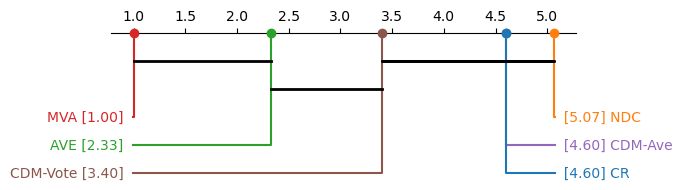

                CR       NDC       AVE       MVA   CDM-Ave  CDM-Vote
CR        1.000000  0.776233  0.142467  0.001000  0.900000  0.719867
NDC       0.776233  1.000000  0.002862  0.001000  0.832599  0.088754
AVE       0.142467  0.002862  1.000000  0.142467  0.113539  0.888963
MVA       0.001000  0.001000  0.142467  1.000000  0.001000  0.005906
CDM-Ave   0.900000  0.832599  0.113539  0.001000  1.000000  0.663502
CDM-Vote  0.719867  0.088754  0.888963  0.005906  0.663502  1.000000


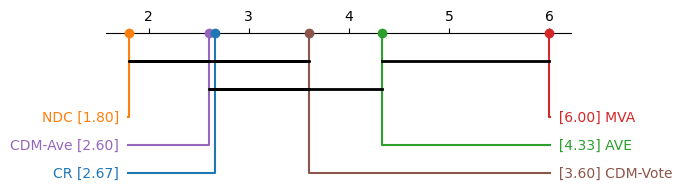

                CR  NDC       AVE       MVA  CDM-Ave  CDM-Vote
CR        1.000000  0.9  0.663502  0.900000      0.9       0.9
NDC       0.900000  1.0  0.900000  0.900000      0.9       0.9
AVE       0.663502  0.9  1.000000  0.550773      0.9       0.9
MVA       0.900000  0.9  0.550773  1.000000      0.9       0.9
CDM-Ave   0.900000  0.9  0.900000  0.900000      1.0       0.9
CDM-Vote  0.900000  0.9  0.900000  0.900000      0.9       1.0


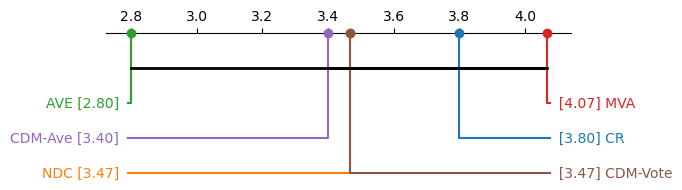

                CR       NDC       AVE       MVA   CDM-Ave  CDM-Vote
CR        1.000000  0.900000  0.018937  0.432799  0.900000  0.900000
NDC       0.900000  1.000000  0.052848  0.239385  0.900000  0.900000
AVE       0.018937  0.052848  1.000000  0.001000  0.217403  0.052848
MVA       0.432799  0.239385  0.001000  1.000000  0.060552  0.239385
CDM-Ave   0.900000  0.900000  0.217403  0.060552  1.000000  0.900000
CDM-Vote  0.900000  0.900000  0.052848  0.239385  0.900000  1.000000


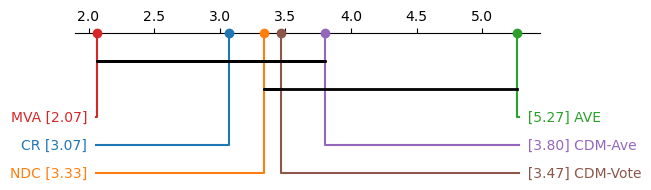

                CR       NDC       AVE       MVA   CDM-Ave  CDM-Vote
CR        1.000000  0.016168  0.832599  0.607137  0.142467  0.142467
NDC       0.016168  1.000000  0.314304  0.550773  0.900000  0.900000
AVE       0.832599  0.314304  1.000000  0.900000  0.776233  0.776233
MVA       0.607137  0.550773  0.900000  1.000000  0.900000  0.900000
CDM-Ave   0.142467  0.900000  0.776233  0.900000  1.000000  0.900000
CDM-Vote  0.142467  0.900000  0.776233  0.900000  0.900000  1.000000


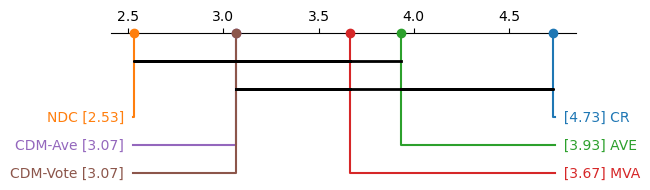

                CR       NDC       AVE       MVA   CDM-Ave  CDM-Vote
CR        1.000000  0.003443  0.900000  0.113539  0.088754  0.832599
NDC       0.003443  1.000000  0.001000  0.001000  0.900000  0.127008
AVE       0.900000  0.001000  1.000000  0.342035  0.018937  0.522591
MVA       0.113539  0.001000  0.342035  1.000000  0.001000  0.002862
CDM-Ave   0.088754  0.900000  0.018937  0.001000  1.000000  0.663502
CDM-Vote  0.832599  0.127008  0.522591  0.002862  0.663502  1.000000


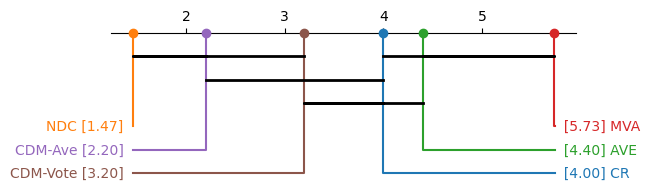

                CR       NDC       AVE       MVA   CDM-Ave  CDM-Vote
CR        1.000000  0.550773  0.016168  0.001000  0.016168  0.001000
NDC       0.550773  1.000000  0.607137  0.001000  0.607137  0.142467
AVE       0.016168  0.607137  1.000000  0.004131  0.900000  0.900000
MVA       0.001000  0.001000  0.004131  1.000000  0.004131  0.069157
CDM-Ave   0.016168  0.607137  0.900000  0.004131  1.000000  0.900000
CDM-Vote  0.001000  0.142467  0.900000  0.069157  0.900000  1.000000


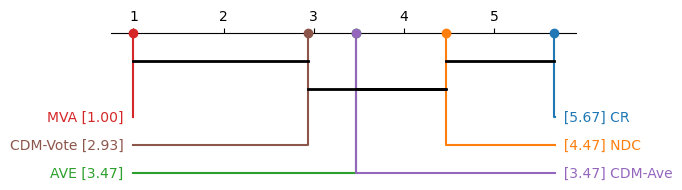

                CR       NDC       AVE       MVA   CDM-Ave  CDM-Vote
CR        1.000000  0.288175  0.719867  0.001000  0.900000  0.401904
NDC       0.288175  1.000000  0.900000  0.004948  0.860778  0.900000
AVE       0.719867  0.900000  1.000000  0.001000  0.900000  0.900000
MVA       0.001000  0.004948  0.001000  1.000000  0.001000  0.002372
CDM-Ave   0.900000  0.860778  0.900000  0.001000  1.000000  0.900000
CDM-Vote  0.401904  0.900000  0.900000  0.002372  0.900000  1.000000


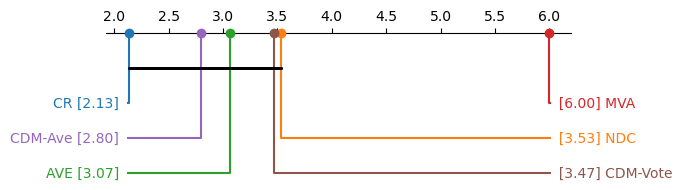

                CR       NDC       AVE       MVA   CDM-Ave  CDM-Vote
CR        1.000000  0.900000  0.005906  0.832599  0.314304  0.900000
NDC       0.900000  1.000000  0.003443  0.900000  0.239385  0.900000
AVE       0.005906  0.003443  1.000000  0.001000  0.663502  0.009892
MVA       0.832599  0.900000  0.001000  1.000000  0.016168  0.748050
CDM-Ave   0.314304  0.239385  0.663502  0.016168  1.000000  0.401904
CDM-Vote  0.900000  0.900000  0.009892  0.748050  0.401904  1.000000


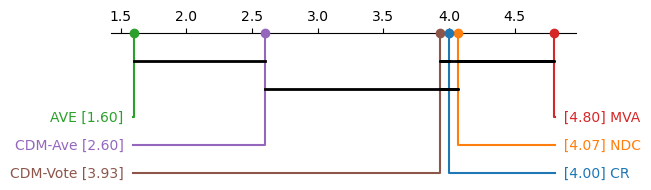

                CR       NDC       AVE       MVA   CDM-Ave  CDM-Vote
CR        1.000000  0.900000  0.001089  0.263116  0.060552  0.900000
NDC       0.900000  1.000000  0.001089  0.263116  0.060552  0.900000
AVE       0.001089  0.001089  1.000000  0.001000  0.832599  0.001616
MVA       0.263116  0.263116  0.001000  1.000000  0.001000  0.217403
CDM-Ave   0.060552  0.060552  0.832599  0.001000  1.000000  0.078696
CDM-Vote  0.900000  0.900000  0.001616  0.217403  0.078696  1.000000


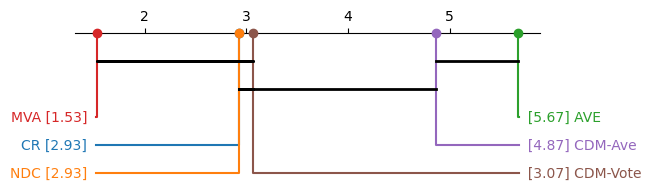

                CR       NDC       AVE       MVA   CDM-Ave  CDM-Vote
CR        1.000000  0.060552  0.494064  0.011686  0.011686  0.001000
NDC       0.060552  1.000000  0.900000  0.900000  0.900000  0.263116
AVE       0.494064  0.900000  1.000000  0.607137  0.607137  0.018937
MVA       0.011686  0.900000  0.607137  1.000000  0.900000  0.578953
CDM-Ave   0.011686  0.900000  0.607137  0.900000  1.000000  0.578953
CDM-Vote  0.001000  0.263116  0.018937  0.578953  0.578953  1.000000


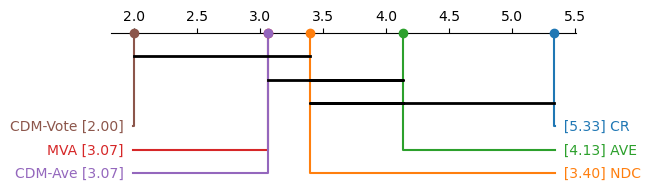

                CR       NDC       AVE       MVA   CDM-Ave  CDM-Vote
CR        1.000000  0.239385  0.900000  0.263116  0.607137  0.009892
NDC       0.239385  1.000000  0.060552  0.001000  0.900000  0.832599
AVE       0.900000  0.060552  1.000000  0.607137  0.263116  0.001089
MVA       0.263116  0.001000  0.607137  1.000000  0.002862  0.001000
CDM-Ave   0.607137  0.900000  0.263116  0.002862  1.000000  0.463679
CDM-Vote  0.009892  0.832599  0.001089  0.001000  0.463679  1.000000


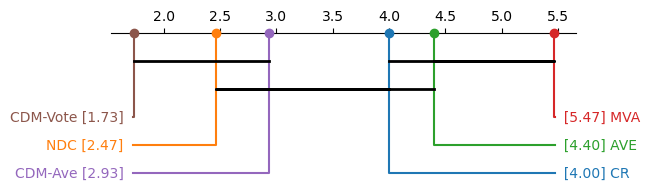

In [41]:
from scipy import stats
import scikit_posthocs as sp
model_names = ['CR','NDC', 'AVE', 'MVA', 'CDM-Ave', 'CDM-Vote']
measurements = ['determinacy', 'single-set accuracy', 'set accuracy', 'set size', 'u65 score', 'u80 score']
noise_levels = [0, 0.3]
noise_indicates = ['without_noise', 'with_noise']
colors = {'CR':'tab:blue', 'NDC':'tab:orange', 'AVE':'tab:green', 'MVA':'tab:red',
         'CDM-Ave':'tab:purple', 'CDM-Vote':'tab:brown'}
# colors = ['tab:red', 'tab:purple', 'tab:brown', 'tab:blue', 'tab:orange', 'tab:green']
for nl in range(len(noise_levels)):
    noise_level = noise_levels[nl]
    mean_eval = np.load(('results/{}_noise/total_evaluation_mean.npy'.format(str(noise_level))))
    mean_eval = np.delete(mean_eval, 5, axis=0)
    friedman_results = np.zeros((len(measurements), len(model_names)+1))
    nemenyi_test_result = np.zeros((2, len(measurements), len(model_names)-1))
    for i in range(len(measurements)):
        eva = mean_eval[i]
        if measurements[i] == 'set size':
            friedman_results[i,:-1] = (np.argsort(np.argsort(eva))+1).mean(axis=0).round(3)
        else:
            friedman_results[i,:-1] = (np.argsort(np.argsort(-eva))+1).mean(axis=0).round(3)
        m0 = eva[:, 0]
        m1 = eva[:, 1]
        m2 = eva[:, 2]
        m3 = eva[:, 3]
        m4 = eva[:, 4]
        m5 = eva[:, 5]
        friedman_results[i,-1] = stats.friedmanchisquare(m0, m1, m2, m3, m4, m5)[1]


        test_results_df = sp.posthoc_nemenyi_friedman(eva)
#         test_results_df = sp.posthoc_nemenyi(eva.T)
#         test_results_df = sp.posthoc_wilcoxon(eva.T, p_adjust = 'holm')
        test_results_matrix = np.array(test_results_df).round(3)
        test_results_df.index = model_names
        test_results_df.columns = model_names
        print(test_results_df)
        nemenyi_test_result[0,i,:] = test_results_matrix[[True,True,True,True,False,True],4] # 
        nemenyi_test_result[1,i,:] = test_results_matrix[[True,True,True,True,True,False],5] # 
        rank_i = pd.Series(friedman_results[i,:-1], index=model_names)
        plt.figure(figsize=(6, 2), dpi=100)
#         plt.title('Friedman-Nemenyi test of {} (without label noise)'.format(measurements[i]))
        sp.critical_difference_diagram(rank_i, test_results_df, 
                                       label_fmt_left='{label} [{rank:.2f}]  ',
                                       label_fmt_right='  [{rank:.2f}] {label}',
                                       color_palette=colors)
#         plt.savefig('results/nemenyi test/{}_test_{}.png'.format(measurements[i], noise_indicates[nl]), bbox_inches='tight', dpi=400)
        plt.show()
        plt.close()

#     print(friedman_results)
#     print(nemenyi_test_result)
#     np.save('results/nemenyi test/friedman results {}.npy'.format(noise_indicates[nl]), friedman_results)
#     np.save('results/nemenyi test/nemenyi_test_result {}.npy'.format(noise_indicates[nl]), nemenyi_test_result)

In [32]:
test_results_df

,CR,NDC,AVE,MVA,CDM-Ave,CDM-Vote
CR,1.000000,0.239385,0.900000,0.263116,0.607137,0.009892
NDC,0.239385,1.000000,0.060552,0.001000,0.900000,0.832599
AVE,0.900000,0.060552,1.000000,0.607137,0.263116,0.001089
MVA,0.263116,0.001000,0.607137,1.000000,0.002862,0.001000
CDM-Ave,0.607137,0.900000,0.263116,0.002862,1.000000,0.463679
CDM-Vote,0.009892,0.832599,0.001089,0.001000,0.463679,1.000000


### Latex tables

In [23]:
noise_level = 0
mean_eval = np.load(('results/{}_noise/total_evaluation_mean.npy'.format(str(noise_level))))
std_eval = np.load(('results/{}_noise/total_evaluation_std.npy'.format(str(noise_level))))
mean_eval = mean_eval.round(3)
std_eval = std_eval.round(3)
columns = ['Data', 'CR','NDC', 'AVE', 'MVA', 'CDM-Ave', 'CDM-Vote']
criteria = ['det', 'ssa', 'sa', 'ss', 'u65', 'f1', 'u80']
n_cretria = mean_eval.shape[0]
c = mean_eval.shape[2] + 1
r = mean_eval.shape[1]
data_names = ['balance-scale', 'ecoli', 'forest', 'glass', 'letter', 'libras', 'optdigits', 'page-blocks',
                'seeds','spectrometer', 'vehicle', 'vowel', 'waveform', 'wine-quality', 'yeast']

for e in range(n_cretria):
    df_mean = mean_eval[e]
    df_std = std_eval[e]
    print(criteria[e])
    string = '\\toprule[1pt] \n'
    for j in range(c):
        if j < c-1:
            string = string + columns[j] + ' & '
        else:
            string = string + columns[j] + ' \\\\ \n'
    string += '\\midrule \n'       
    for i in range(r):
        row_max_index = np.where(max(df_mean[i,:])==df_mean[i,:])[0]+1
        for j in range(c):
            if j < c-1:
                if j == 0:
                    string = string + data_names[i].capitalize() + ' & '
                else:
                    if j in row_max_index:
                         string = string + "\\textbf{" + "{:.3f}".format(df_mean[i,j-1]) + '±' + "{:.3f}".format(df_std[i,j-1]) + '} & ' #
                    else:
                        string = string + "{:.3f}".format(df_mean[i,j-1]) + '±' + "{:.3f}".format(df_std[i,j-1]) + ' & ' # 
            else:
                if j in row_max_index:
                    string = string + "\\textbf{" + "{:.3f}".format(df_mean[i,j-1]) +  '±' +"{:.3f}".format(df_std[i,j-1]) + '} \\\\ \n' #
                else:
                    string = string + "{:.3f}".format(df_mean[i,j-1]) +  '±' + "{:.3f}".format(df_std[i,j-1]) + ' \\\\ \n' #
    string += '\\midrule \n '            
    print(string)
    print(df_mean.mean(axis=0).round(3))

det
\toprule[1pt] 
Data & CR & NDC & AVE & MVA & CDM-Ave & CDM-Vote \\ 
\midrule 
Balance-scale & 0.871±0.059 & 0.807±0.028 & 0.844±0.024 & \textbf{0.980±0.009} & 0.778±0.030 & 0.787±0.022 \\ 
Ecoli & 0.844±0.081 & 0.833±0.052 & 0.912±0.023 & \textbf{0.994±0.007} & 0.844±0.043 & 0.850±0.048 \\ 
Forest & 0.930±0.042 & 0.906±0.032 & 0.954±0.027 & \textbf{0.999±0.003} & 0.912±0.030 & 0.920±0.030 \\ 
Glass & 0.771±0.069 & 0.745±0.059 & 0.829±0.029 & \textbf{0.993±0.011} & 0.762±0.065 & 0.771±0.063 \\ 
Letter & 0.662±0.018 & 0.792±0.019 & 0.761±0.025 & \textbf{0.978±0.010} & 0.798±0.018 & 0.799±0.019 \\ 
Libras & 0.628±0.045 & 0.703±0.060 & 0.764±0.029 & \textbf{0.976±0.020} & 0.711±0.053 & 0.731±0.049 \\ 
Optdigits & 0.941±0.009 & 0.956±0.008 & 0.976±0.005 & \textbf{0.998±0.001} & 0.959±0.007 & 0.959±0.007 \\ 
Page-blocks & 0.982±0.013 & 0.975±0.010 & 0.984±0.007 & \textbf{1.000±0.001} & 0.978±0.009 & 0.979±0.007 \\ 
Seeds & 0.952±0.054 & 0.919±0.047 & 0.962±0.036 & \textbf{0.998±0.007} & 

In [24]:
noise_level = 0.3
mean_eval = np.load(('results/{}_noise/total_evaluation_mean.npy'.format(str(noise_level))))
std_eval = np.load(('results/{}_noise/total_evaluation_std.npy'.format(str(noise_level))))
mean_eval = mean_eval.round(3)
std_eval = std_eval.round(3)
columns = ['Data', 'CR','NDC', 'AVE', 'MVA', 'CDM-Ave', 'CDM-Vote']
criteria = ['det', 'ssa', 'sa', 'ss', 'u65', 'f1', 'u80']
n_cretria = mean_eval.shape[0]
c = mean_eval.shape[2] + 1
r = mean_eval.shape[1]
data_names = ['balance-scale', 'ecoli', 'forest', 'glass', 'letter', 'libras', 'optdigits', 'page-blocks',
                'seeds','spectrometer', 'vehicle', 'vowel', 'waveform', 'wine-quality', 'yeast']

for e in range(n_cretria):
    df_mean = mean_eval[e]
    df_std = std_eval[e]
    print(criteria[e])
    string = '\\toprule[1pt] \n'
    for j in range(c):
        if j < c-1:
            string = string + columns[j] + ' & '
        else:
            string = string + columns[j] + ' \\\\ \n'
    string += '\\midrule \n'       
    for i in range(r):
        row_max_index = np.where(max(df_mean[i,:])==df_mean[i,:])[0]+1
        for j in range(c):
            if j < c-1:
                if j == 0:
                    string = string + data_names[i].capitalize() + ' & '
                else:
                    if j in row_max_index:
                         string = string + "\\textbf{" + "{:.3f}".format(df_mean[i,j-1]) + '±' + "{:.3f}".format(df_std[i,j-1]) + '} & ' #
                    else:
                        string = string + "{:.3f}".format(df_mean[i,j-1]) + '±' + "{:.3f}".format(df_std[i,j-1]) + ' & ' # 
            else:
                if j in row_max_index:
                    string = string + "\\textbf{" + "{:.3f}".format(df_mean[i,j-1]) +  '±' +"{:.3f}".format(df_std[i,j-1]) + '} \\\\ \n' #
                else:
                    string = string + "{:.3f}".format(df_mean[i,j-1]) +  '±' + "{:.3f}".format(df_std[i,j-1]) + ' \\\\ \n' #
    string += '\\midrule \\'           
    print(string)
    print(df_mean.mean(axis=0).round(3))

det
\toprule[1pt] 
Data & CR & NDC & AVE & MVA & CDM-Ave & CDM-Vote \\ 
\midrule 
Balance-scale & 0.540±0.140 & 0.632±0.045 & 0.646±0.062 & \textbf{0.982±0.010} & 0.563±0.054 & 0.595±0.043 \\ 
Ecoli & 0.656±0.073 & 0.726±0.053 & 0.744±0.039 & \textbf{0.979±0.019} & 0.781±0.046 & 0.845±0.040 \\ 
Forest & 0.737±0.052 & 0.722±0.054 & 0.823±0.043 & \textbf{0.988±0.012} & 0.753±0.048 & 0.746±0.049 \\ 
Glass & 0.448±0.097 & 0.540±0.066 & 0.593±0.059 & \textbf{0.979±0.025} & 0.584±0.080 & 0.635±0.088 \\ 
Letter & 0.416±0.032 & 0.625±0.019 & 0.514±0.029 & \textbf{0.957±0.012} & 0.680±0.022 & 0.732±0.020 \\ 
Libras & 0.376±0.066 & 0.622±0.049 & 0.582±0.039 & \textbf{0.976±0.015} & 0.635±0.037 & 0.625±0.044 \\ 
Optdigits & 0.675±0.011 & 0.895±0.009 & 0.876±0.011 & \textbf{0.995±0.002} & 0.922±0.010 & 0.933±0.009 \\ 
Page-blocks & 0.846±0.020 & 0.821±0.022 & 0.878±0.015 & \textbf{0.995±0.002} & 0.873±0.016 & 0.887±0.022 \\ 
Seeds & 0.586±0.190 & 0.702±0.074 & 0.712±0.138 & \textbf{0.990±0.012} & 

In [29]:
noise_level = 0
mean_eval = np.load(('results/{}_noise/total_evaluation_mean.npy'.format(str(noise_level))))
mean_eval = mean_eval.mean(axis=1).round(3)
n_rows = mean_eval.shape[0]
n_cols = mean_eval.shape[1]

criteria = ['Determinacy', 'Single set accuracy', 'Set accuracy', 'Set size', 'u65 score', 'f1 score', 'u80 score']
string = ""
for i in range(n_rows):
    row_max_index = np.where(max(mean_eval[i,:])==mean_eval[i,:])[0]
    string = string + criteria[i] + " & "
    for j in range(n_cols):
        if j in row_max_index:
            string = string + "\\textbf{" + "{:.3f}".format(mean_eval[i,j]) + "} & "
        else:
            string = string + "{:.3f}".format(mean_eval[i,j]) + " & "
    string = string[:-2]
    string += "\\\\ \n"
print(mean_eval)
print(string)

[[0.767 0.775 0.833 0.987 0.787 0.796]
 [0.891 0.894 0.875 0.822 0.89  0.885]
 [0.873 0.873 0.904 0.802 0.881 0.878]
 [2.115 2.054 3.544 2.042 2.135 2.116]
 [0.813 0.824 0.815 0.818 0.822 0.821]
 [0.817 0.827 0.818 0.818 0.826 0.824]
 [0.842 0.852 0.834 0.819 0.849 0.847]]
Determinacy & 0.767 & 0.775 & 0.833 & \textbf{0.987} & 0.787 & 0.796 \\ 
Single set accuracy & 0.891 & \textbf{0.894} & 0.875 & 0.822 & 0.890 & 0.885 \\ 
Set accuracy & 0.873 & 0.873 & \textbf{0.904} & 0.802 & 0.881 & 0.878 \\ 
Set size & 2.115 & 2.054 & \textbf{3.544} & 2.042 & 2.135 & 2.116 \\ 
u65 score & 0.813 & \textbf{0.824} & 0.815 & 0.818 & 0.822 & 0.821 \\ 
f1 score & 0.817 & \textbf{0.827} & 0.818 & 0.818 & 0.826 & 0.824 \\ 
u80 score & 0.842 & \textbf{0.852} & 0.834 & 0.819 & 0.849 & 0.847 \\ 



In [31]:
noise_level = 0.3
mean_eval = np.load(('results/{}_noise/total_evaluation_mean.npy'.format(str(noise_level))))
mean_eval = mean_eval.mean(axis=1).round(3)

n_rows = mean_eval.shape[0]
n_cols = mean_eval.shape[1]

criteria = ['Determinacy', 'Single set accuracy', 'Set accuracy', 'Set size', 'u65 score', 'f1 score', 'u80 score']
string = ""
for i in range(n_rows):
    row_max_index = np.where(max(mean_eval[i,:])==mean_eval[i,:])[0]
    string = string + criteria[i] + " & "
    for j in range(n_cols):
        if j in row_max_index:
            string = string + "\\textbf{" + "{:.3f}".format(mean_eval[i,j]) + "} & "
        else:
            string = string + "{:.3f}".format(mean_eval[i,j]) + " & "
    string = string[:-2]
    string += "\\\\ \n"
print(mean_eval)
print(string)

[[0.524 0.632 0.655 0.976 0.658 0.68 ]
 [0.874 0.847 0.855 0.745 0.85  0.847]
 [0.849 0.838 0.934 0.779 0.863 0.841]
 [2.239 2.1   5.463 2.058 2.417 2.192]
 [0.705 0.735 0.71  0.74  0.738 0.748]
 [0.713 0.741 0.718 0.74  0.744 0.753]
 [0.763 0.78  0.746 0.742 0.78  0.786]]
Determinacy & 0.524 & 0.632 & 0.655 & \textbf{0.976} & 0.658 & 0.680 \\ 
Single set accuracy & \textbf{0.874} & 0.847 & 0.855 & 0.745 & 0.850 & 0.847 \\ 
Set accuracy & 0.849 & 0.838 & \textbf{0.934} & 0.779 & 0.863 & 0.841 \\ 
Set size & 2.239 & 2.100 & \textbf{5.463} & 2.058 & 2.417 & 2.192 \\ 
u65 score & 0.705 & 0.735 & 0.710 & 0.740 & 0.738 & \textbf{0.748} \\ 
f1 score & 0.713 & 0.741 & 0.718 & 0.740 & 0.744 & \textbf{0.753} \\ 
u80 score & 0.763 & 0.780 & 0.746 & 0.742 & 0.780 & \textbf{0.786} \\ 

